In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv('test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# data  processing part 1

In [4]:
train.drop(columns=['Loan_ID'], inplace=True)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
check_missing = train.isnull().sum() * 100 / train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [6]:
train['Credit_History'].fillna(0, inplace=True)
train['Self_Employed'].fillna('No', inplace=True)
train['LoanAmount'].fillna(0, inplace=True)
train['Dependents'].fillna(0, inplace=True)
train['Loan_Amount_Term'].fillna(0, inplace=True)
train['Gender'].fillna('Other', inplace=True)
train['Married'].fillna('Other', inplace=True)

In [7]:
check_missing = train.isnull().sum() * 100 / train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# exploratory data analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

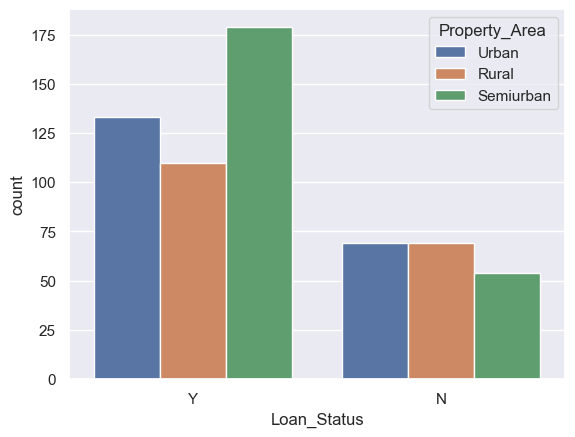

In [8]:
sns.countplot(data=train, x="Loan_Status", hue="Property_Area")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

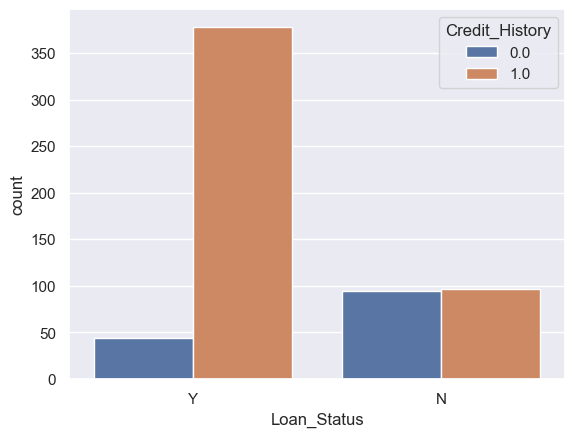

In [9]:
sns.countplot(data=train, x="Loan_Status", hue="Credit_History")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

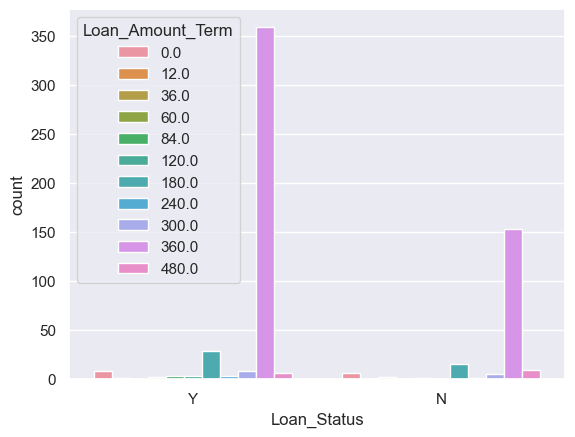

In [10]:
sns.countplot(data=train, x="Loan_Status", hue="Loan_Amount_Term")

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

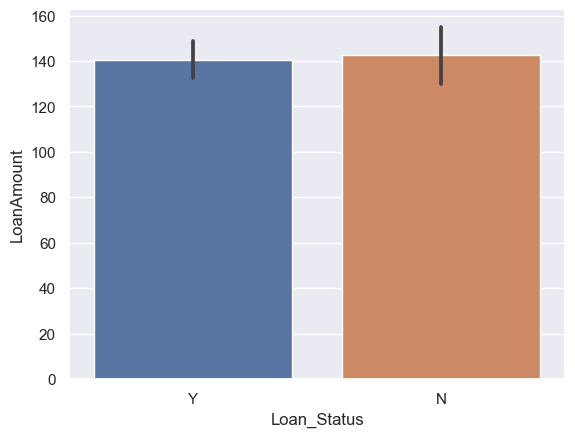

In [11]:
sns.barplot(data=train, x="Loan_Status", y="LoanAmount")

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

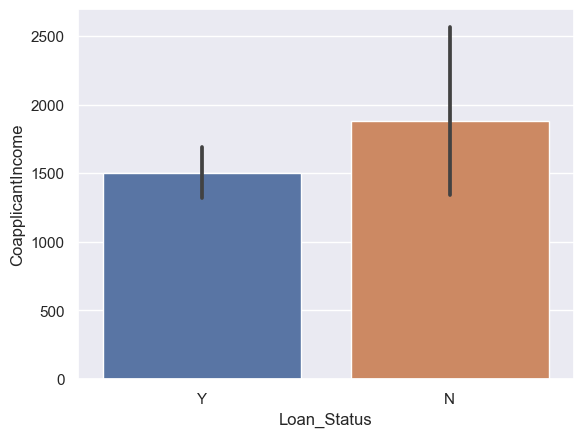

In [12]:
sns.barplot(data=train, x="Loan_Status", y="CoapplicantIncome")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

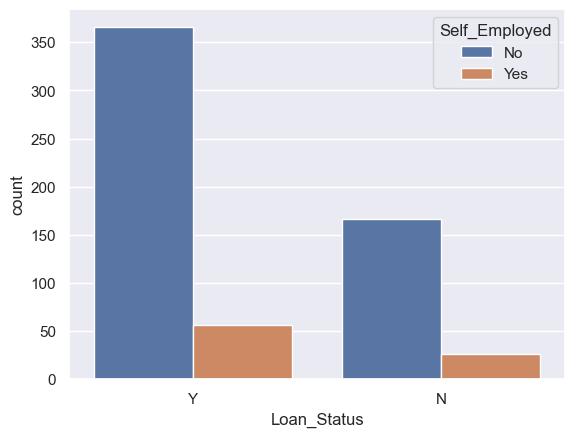

In [13]:
sns.countplot(data=train, x="Loan_Status", hue="Self_Employed")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

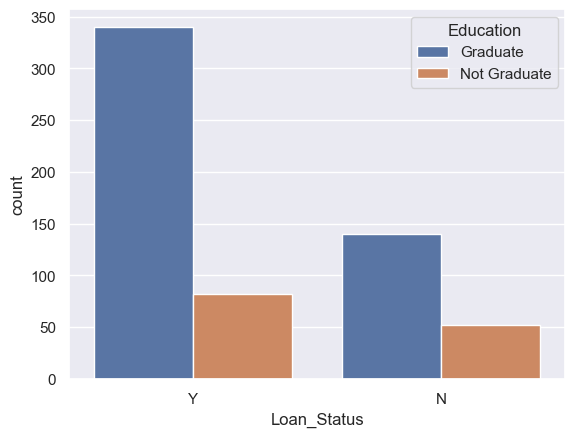

In [14]:
sns.countplot(data=train, x="Loan_Status", hue="Education")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

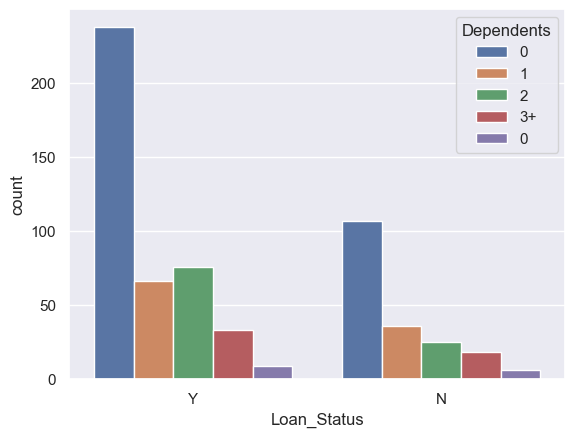

In [15]:
sns.countplot(data=train, x="Loan_Status", hue="Dependents")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

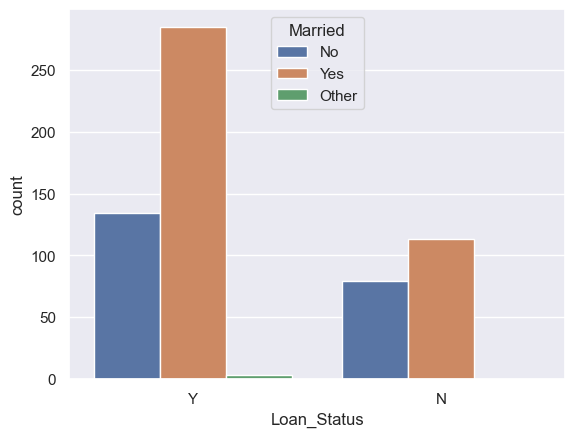

In [16]:
sns.countplot(data=train, x="Loan_Status", hue="Married")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

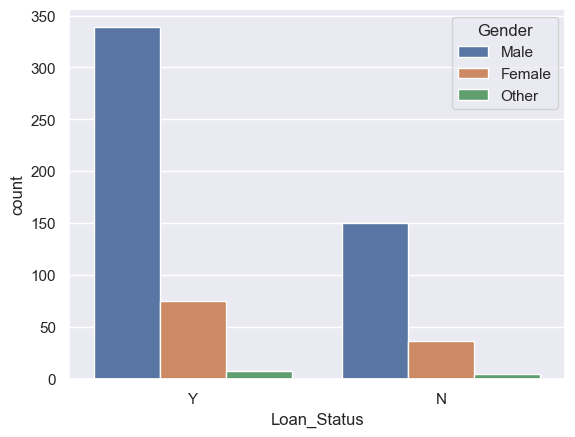

In [17]:
sns.countplot(data=train, x="Loan_Status", hue="Gender")

# data processing part 2

In [18]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
train["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [20]:
train["Married"].unique()

array(['No', 'Yes', 'Other'], dtype=object)

In [21]:
train["Dependents"].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [22]:
train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [23]:
train["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
train["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
train["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [26]:
train["Loan_Amount_Term"].unique()

array([360., 120., 240.,   0., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train["Gender"]= label_encoder.fit_transform(train['Gender'])
train["Gender"].unique()

array([1, 0, 2])

In [28]:
train["Married"]= label_encoder.fit_transform(train['Married'])
train["Married"].unique()

array([0, 2, 1])

In [29]:
train["Dependents"] = train["Dependents"].astype(str)
train["Dependents"] = label_encoder.fit_transform(train["Dependents"])

In [30]:
train["Education"]= label_encoder.fit_transform(train['Education'])
train["Education"].unique()

array([0, 1])

In [31]:
train["Self_Employed"]= label_encoder.fit_transform(train['Self_Employed'])
train["Self_Employed"].unique()

array([0, 1])

In [32]:
train["Property_Area"]= label_encoder.fit_transform(train['Property_Area'])
train["Property_Area"].unique()

array([2, 0, 1])

In [33]:
train["Loan_Amount_Term"]= label_encoder.fit_transform(train['Loan_Amount_Term'])
train["Loan_Amount_Term"].unique()

array([ 9,  5,  7,  0,  6,  3,  8, 10,  2,  4,  1], dtype=int64)

In [34]:
train["Loan_Status"]= label_encoder.fit_transform(train['Loan_Status'])
train["Loan_Status"].unique()

array([1, 0])

# check the outlier

<AxesSubplot:xlabel='ApplicantIncome'>

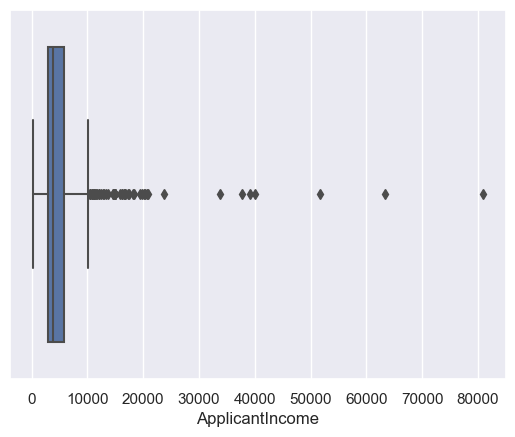

In [35]:
sns.boxplot(x=train["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

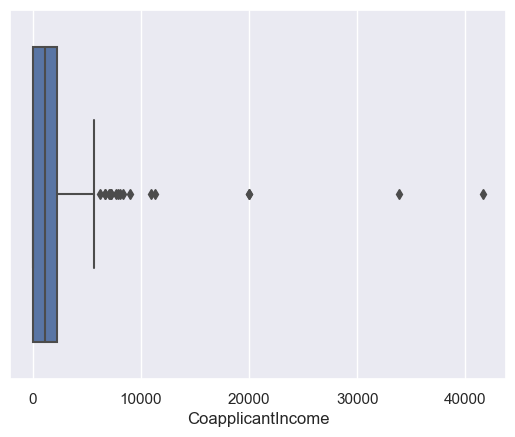

In [36]:
sns.boxplot(x=train["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount'>

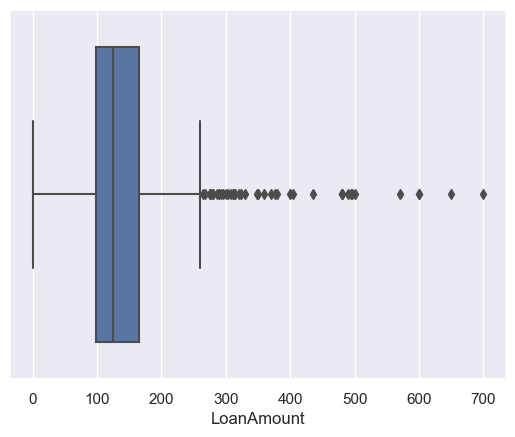

In [37]:
sns.boxplot(x=train["LoanAmount"])

In [38]:
import scipy.stats as stats
z= np.abs(stats.zscore(train))
data_clean = train[(z<3).all(axis = 1)]
data_clean.shape

(572, 12)

# balanced class data

C:\Users\Muhammed Ashik.A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    398
0    174
Name: Loan_Status, dtype: int64

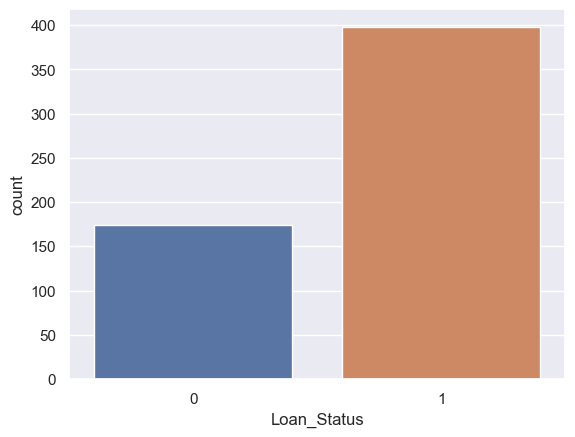

In [39]:
sns.countplot(data_clean['Loan_Status'])
data_clean['Loan_Status'].value_counts()

In [46]:
from sklearn.utils import resample
df_majority = data_clean[(data_clean['Loan_Status']==1)]
df_minority = data_clean[(data_clean['Loan_Status']==0)]
df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples= 398,
                                random_state=0)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

C:\Users\Muhammed Ashik.A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    398
1    398
Name: Loan_Status, dtype: int64

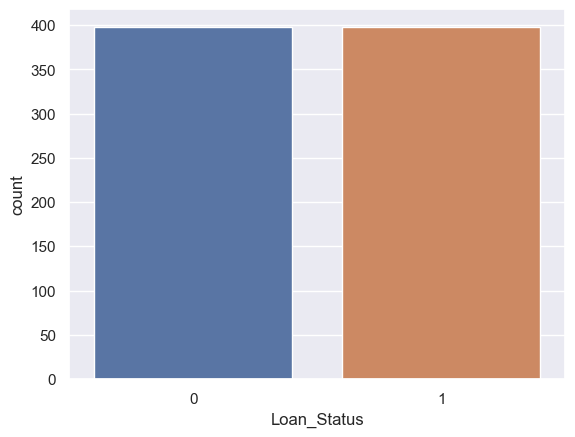

In [47]:
sns.countplot(df_upsampled['Loan_Status'])
df_upsampled['Loan_Status'].value_counts()

# data correlation

<AxesSubplot:>

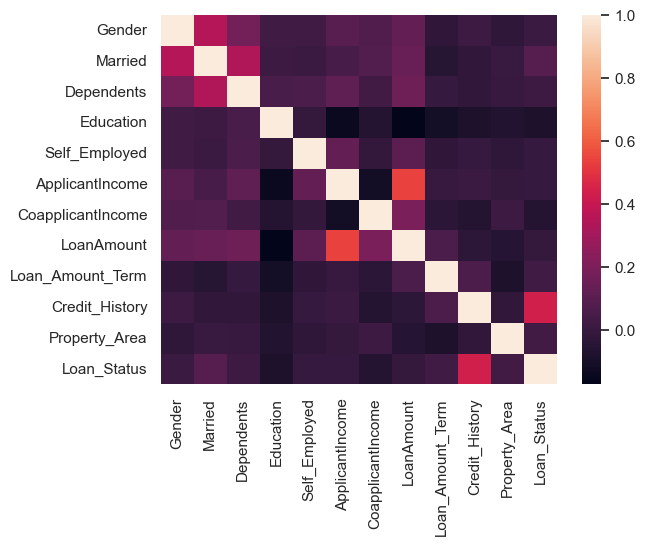

In [48]:
sns.heatmap(train.corr(), fmt='.2g')

# machine learning model building

In [51]:
X = df_upsampled.drop('Loan_Status', axis=1)
y = df_upsampled['Loan_Status']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [59]:
y_pred = dtree.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score:  80.62 %


In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('f1-score :',(f1_score(y_test, y_pred)))
print('precision_score :',(precision_score(y_test, y_pred)))
print('recall_score :',(recall_score(y_test, y_pred)))

f1-score : 0.7947019867549668
precision_score : 0.8333333333333334
recall_score : 0.759493670886076


# random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [65]:
y_pred = rfc.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score:  89.38 %


In [66]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('f1-score :',(f1_score(y_test, y_pred)))
print('precision_score :',(precision_score(y_test, y_pred)))
print('recall_score :',(recall_score(y_test, y_pred)))

f1-score : 0.8903225806451613
precision_score : 0.9078947368421053
recall_score : 0.8734177215189873


# logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

C:\Users\Muhammed Ashik.A\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [71]:
y_pred = lr.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score:  70.0 %


In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('f1-score :',(f1_score(y_test, y_pred)))
print('precision_score :',(precision_score(y_test, y_pred)))
print('recall_score :',(recall_score(y_test, y_pred)))

f1-score : 0.7419354838709676
precision_score : 0.6448598130841121
recall_score : 0.8734177215189873


# decision tree feature importances

In [75]:
imp_df = pd.DataFrame({
    "Feature_Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature_Name,Importance
5,ApplicantIncome,0.271856
6,CoapplicantIncome,0.196623
7,LoanAmount,0.174340
9,Credit_History,0.158868
10,Property_Area,0.061250
8,Loan_Amount_Term,0.043703
0,Gender,0.026791
2,Dependents,0.025638
4,Self_Employed,0.014859
3,Education,0.013107


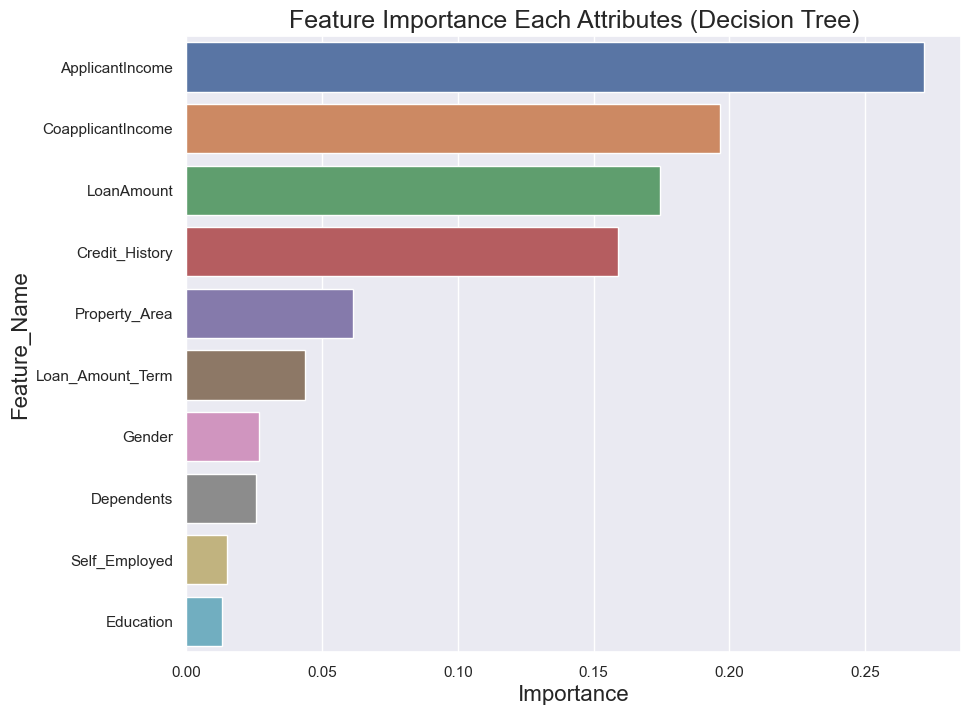

In [78]:
fi2= fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature_Name")
plt.title("Feature Importance Each Attributes (Decision Tree)", fontsize=18)
plt.xlabel ("Importance", fontsize=16)
plt.ylabel ("Feature_Name", fontsize=16)
plt.show()

# random forest importances

In [80]:
imp_df = pd.DataFrame({
    "Feature_Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature_Name,Importance
5,ApplicantIncome,0.225034
7,LoanAmount,0.205685
9,Credit_History,0.150628
6,CoapplicantIncome,0.141021
10,Property_Area,0.061033
2,Dependents,0.054539
8,Loan_Amount_Term,0.046911
0,Gender,0.035341
3,Education,0.029841
1,Married,0.028091


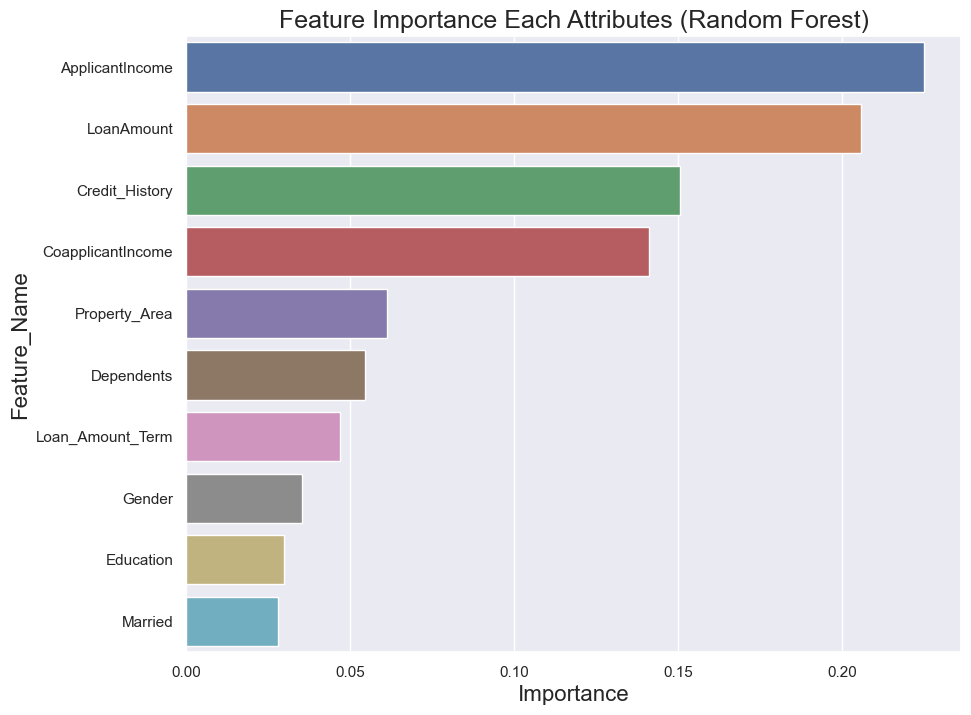

In [81]:
fi2= fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x="Importance", y="Feature_Name")
plt.title("Feature Importance Each Attributes (Random Forest)", fontsize=18)
plt.xlabel ("Importance", fontsize=16)
plt.ylabel ("Feature_Name", fontsize=16)
plt.show()